# [DRAFT] Large-Scale Linear Gaussian Dynamical System 

This notebook does not perform any becnhmark and simply runs the inference procedure and generates some nice plots for the thesis.

Note: This notebook is a draft, the real experiments are in the `notebooks/` folder

_Author: Dmitry Bagaev_

In [1]:
using DrWatson

In [2]:
@quickactivate "RxInferThesisExperiments"

In [3]:
using RxInferThesisExperiments, RxInfer, StaticArrays, Plots, PGFPlotsX, LaTeXStrings
using LinearAlgebra, StableRNGs, Random, BenchmarkTools, ColorSchemes, Dates

[ Info: Precompiling RxInferThesisExperiments [45155ac3-0a9e-41cf-b3f8-8307b1a2d51a]


In [4]:
# For the thesis I use the `pgfplotsx` backend of the `Plots`, since it generates high-quiality plots
# But it is reallyyy slow, if some wants to generate plots faster uncoment the `gr()` line
# pgfplotsx()

# Use fast plotting backend
gr()

Plots.GRBackend()

In [22]:
const environment = RotatingTracking()

RotatingTracking(2, 0.15707963267948966, [0.9876883405951378 -0.15643446504023087; 0.15643446504023087 0.9876883405951378], [1.3 0.0; 0.0 0.7], [1.0 0.0; 0.0 1.0], [1.0 0.0; 0.0 1.0])

In [43]:
# Include the model specification
include(srcdir("models", "rxinfer", "rotating.jl"));

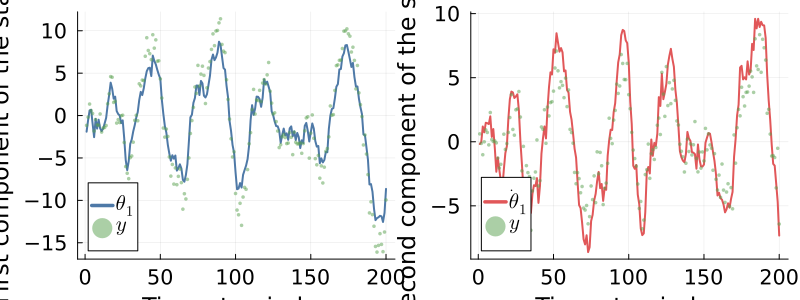

In [40]:
# For plotting purposes I only generate 250 points
T = 200
seed = 43
rng = StableRNG(seed)

states, observations = rand(rng, environment2, T);

# `plotting`range
prange = firstindex(states):lastindex(states)
colors = ColorSchemes.tableau_10

# Some default settings for plotting
pfontsettings = (
    titlefontsize=18,
    guidefontsize=16,
    tickfontsize=14,
    legendfontsize=14,
    legend = :bottomleft,
    size = (400, 300)
)

p1 = plot(xlabel = "Time step index", ylabel = "First component of the state"; pfontsettings...)
p1 = plot!(prange, getindex.(states, 1)[prange], color = colors[1], linewidth = 2, label = L"\theta_1")
p1 = scatter!(p1, prange, getindex.(observations, 1)[prange], ms = 2, msw = 0, color = colors[5], alpha = 0.5, label = L"y")

p2 = plot(xlabel = "Time step index", ylabel = "Second component of the state"; pfontsettings...)
p2 = plot!(p2, prange, getindex.(states, 2)[prange], color = colors[3], linewidth = 2, label = L"\dot{\theta}_1")
p2 = scatter!(p2, prange, getindex.(observations, 2)[prange], ms = 2, msw = 0, color = colors[5], alpha = 0.5, label = L"y")

plot(p1, p2, layout = @layout([ a b ]), size = (800, 300))

In [51]:
@time rximodel = rotating(T, environment.A, environment.B, environment.P, environment.Q) 
@time results = inference(model = rximodel, data = (y = observations, ))

  0.000007 seconds (1 allocation: 48 bytes)
  0.014856 seconds (145.42 k allocations: 6.284 MiB)


Inference results:
  Posteriors       | available for (s)


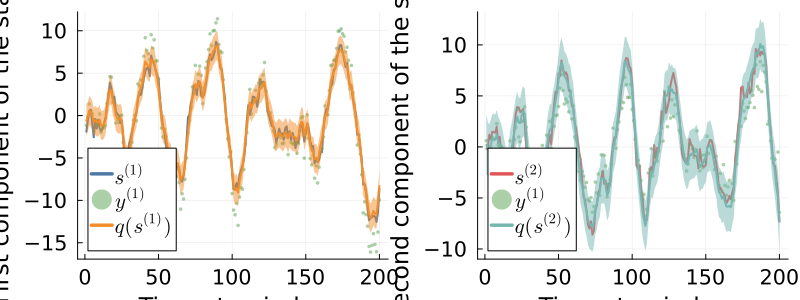

In [59]:
em = mean.(results.posteriors[:s])
ev = sqrt.(cov.(results.posteriors[:s]))
p1 = plot(xlabel = "Time step index", ylabel = "Angle (radians)"; pfontsettings...)

p1 = plot(xlabel = "Time step index", ylabel = "First component of the state"; pfontsettings...)
p1 = plot!(p1, prange, getindex.(states, 1)[prange], color = colors[1], linewidth = 2, label = L"s^{(1)}")
p1 = scatter!(p1, prange, getindex.(observations, 1)[prange], ms = 2, msw = 0, color = colors[5], alpha = 0.5, label = L"y^{(1)}")
p1 = plot!(p1, prange, getindex.(em, 1)[prange], ribbon = 3getindex.(ev, 1, 1), color = colors[2], linewidth = 2, label = L"q(s^{(1)})")

p2 = plot(xlabel = "Time step index", ylabel = "Second component of the state"; pfontsettings...)
p2 = plot!(p2, prange, getindex.(states, 2)[prange], color = colors[3], linewidth = 2, label = L"s^{(2)}")
p2 = scatter!(p2, prange, getindex.(observations, 2)[prange], ms = 2, msw = 0, color = colors[5], alpha = 0.5, label = L"y^{(1)}")
p2 = plot!(p2, prange, getindex.(em, 2)[prange], ribbon = 3getindex.(ev, 2, 2), color = colors[4], linewidth = 2, label = L"q(s^{(2)})")

plot(p1, p2, size = (800, 300), layout = @layout([ a b ]))